## Project: Neighborhood Property Value Analysis – Analyze taxable property values and trends between 2015 and 2022.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the datasets
df_2015 = pd.read_excel('/Users/sunilinus/Downloads/2015_NewNeighb_Boundaries with coordinates (2).xlsx')
df_2022 = pd.read_excel('/Users/sunilinus/Downloads/2022_NewNeighbBoundaries with coordinates (2).xlsx')

In [4]:
# Define a function to clean neighborhood values
def clean_neighborhood(neigh):
    return neigh.lower().replace('nbrhd assn', '').strip()

In [5]:
# Clean neighborhood values in both dataframes
df_2015['Cleaned Neighborhood'] = df_2015['Neighborhood'].apply(clean_neighborhood)
df_2022['Cleaned Neighborhood'] = df_2022['Neighborhood'].apply(clean_neighborhood)

In [6]:
df_2015 = df_2015[df_2015['Assessment Year'] == 2015]
df_2022 = df_2022[df_2022['Assessment Year'] == 2022]

In [7]:
# Define residential property types
residential_property_types = [
    "Residential",
    "Apartments (10 - 49 units)",
    "Apartments (50 units or more)",
    "Apartments (5-9 units)",
    "Duplex-Triplex-Fourplex",
    "Single Family - more than one house per parcel",
    "Single Family Home",
    "Vacant Residential - lot & acreage less than 5 acres",
    "Vacant Residential Land w/XFSB",
    "Condominium",
    "Condo Common Area Assn Own - open/green space",
    "Condo Office (Unit)",
    "Condo Common Area Assn Own - w/improvement",
    "Condo Conversion - Apartments to Platted Condo (Predominately Owner-Occupied)",
    "Condo Common Area Assn Own - sewage disposal, solid waste, brw pit, drainage reservoir, waste land",
    "Vacant Condo (development land)",
    "Condo - Commercial - Store (Unit)",
    "Planned Unit Development",
    "Manufactured Home Park (Lot Rental Community)",
    "Subdivision common area - open/green space, assn owned"
]

In [8]:
# Filter the datasets to include only residential properties
residential_df_2015 = df_2015[df_2015["Property Use"].isin(residential_property_types)]
residential_df_2022 = df_2022[df_2022["Property Use"].isin(residential_property_types)]

In [9]:
# Calculate the average taxable value for residential properties for each neighborhood in 2015 and 2022
residential_avg_taxable_value_2015 = residential_df_2015.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()
residential_avg_taxable_value_2022 = residential_df_2022.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

In [10]:
# Calculate the average taxable value for non-single-family residential properties for each neighborhood in 2015 and 2022
single_family_df_2015 = residential_df_2015[residential_df_2015['Property Use'].isin(['Single Family Home'])]
single_family_avg_taxable_value_2015 = single_family_df_2015.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

single_family_df_2022 = residential_df_2022[residential_df_2022['Property Use'].isin(['Single Family Home'])]
single_family_avg_taxable_value_2022 = single_family_df_2022.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

In [11]:
# Calculate the average taxable value for non-single-family residential properties for each neighborhood in 2015 and 2022
non_single_family_df_2015 = residential_df_2015[~residential_df_2015['Property Use'].isin(['Single Family Home'])]
non_single_family_avg_taxable_value_2015 = non_single_family_df_2015.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

non_single_family_df_2022 = residential_df_2022[~residential_df_2022['Property Use'].isin(['Single Family Home'])]
non_single_family_avg_taxable_value_2022 = non_single_family_df_2022.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

In [12]:
non_residential_df_2015 = df_2015[~df_2015["Property Use"].isin(residential_property_types)]
non_residential_df_2022 = df_2022[~df_2022["Property Use"].isin(residential_property_types)]

In [13]:
# Calculate the average taxable value for non residential properties for each neighborhood in 2015 and 2022
non_residential_avg_taxable_value_2015 = non_residential_df_2015.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()
non_residential_avg_taxable_value_2022 = non_residential_df_2022.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].mean()

### Task 1: Calculate the total taxable property values for 2015 and 2022 in each neighborhood.

In [14]:
# Calculate the total taxable property values for 2015 and 2022 in each neighborhood
total_taxable_value_2015 = df_2015.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].sum()
total_taxable_value_2022 = df_2022.groupby('Cleaned Neighborhood')['Taxable Value – Non-School District'].sum()

In [15]:
# Create a DataFrame to store the total taxable property values
total_taxable_df = pd.DataFrame({
    'Neighborhood': total_taxable_value_2015.index,
    'Total Taxable Value 2015': total_taxable_value_2015.values,
    'Total Taxable Value 2022': total_taxable_value_2022.values
})

In [16]:
# Calculate the percentage increase in total taxable property values from 2015 to 2022
total_taxable_df['Percentage Increase'] = ((total_taxable_df['Total Taxable Value 2022'] - total_taxable_df['Total Taxable Value 2015']) / total_taxable_df['Total Taxable Value 2015']) * 100

In [17]:
# Sort the DataFrame by percentage increase
total_taxable_df = total_taxable_df.sort_values(by='Percentage Increase', ascending=False)

In [18]:
total_taxable_df

,Neighborhood,Total Taxable Value 2015,Total Taxable Value 2022,Percentage Increase
21,thirteenth st heights,10988768,44367946,303.757236
18,palmetto park,62600936,225437083,260.117751
1,campbell park,18136137,64802899,257.313683
0,bartlett park,21322562,71136043,233.618648
13,mel-tan heights,2858498,9426017,229.754193
2,casler heights,3310178,10851223,227.813882
8,harbordale,15615249,48681258,211.754606
19,perkins,6814780,21050727,208.898116
23,twin brooks,31437483,96231142,206.103202
7,fruitland heights,3460393,10385746,200.131979


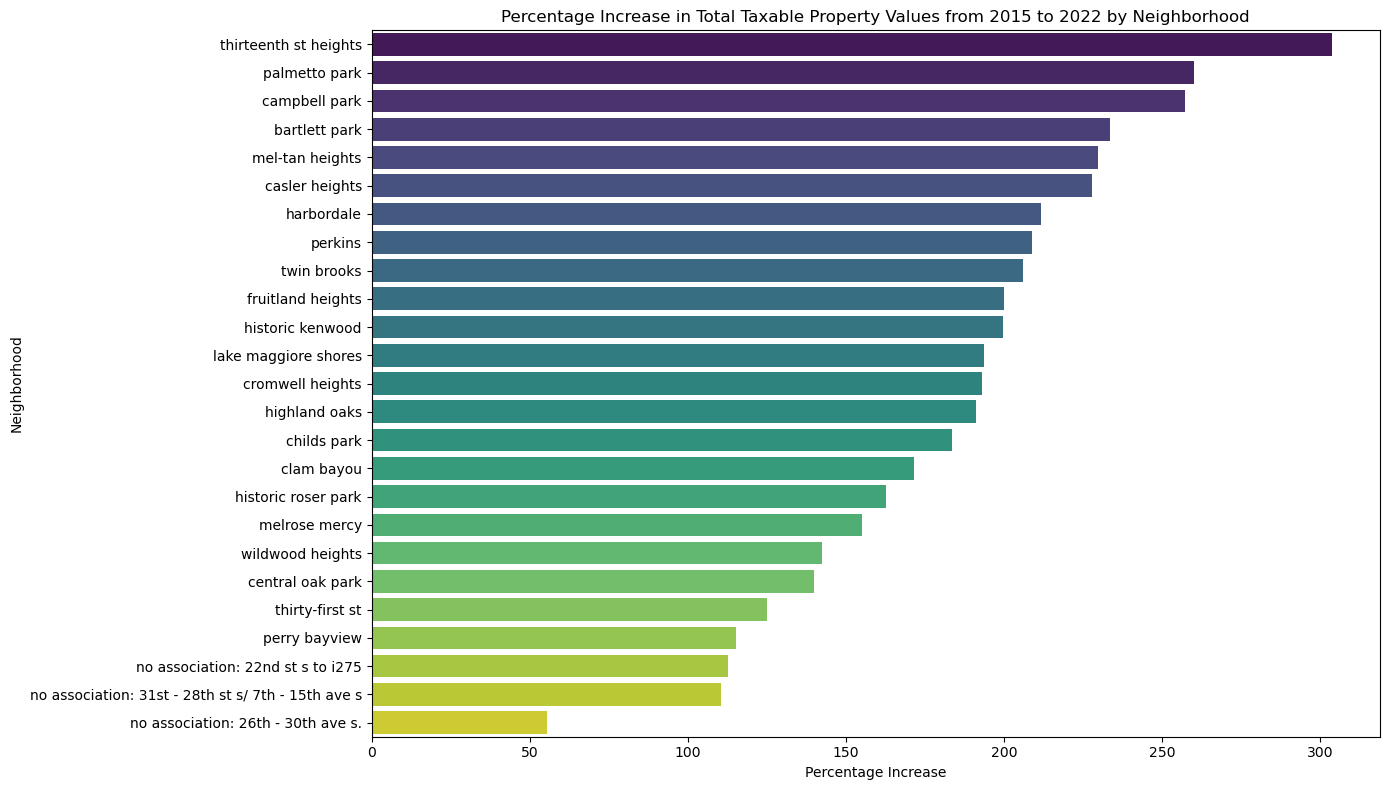

In [19]:
# Create a visualization to demonstrate the increase in total taxable property values
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage Increase', y='Neighborhood', data=total_taxable_df, palette='viridis')
plt.title('Percentage Increase in Total Taxable Property Values from 2015 to 2022 by Neighborhood')
plt.xlabel('Percentage Increase')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

In [20]:
total_taxable_df.to_csv('/Users/sunilinus/Downloads/task_1.csv')

### Question 2: Compare the property value growth rate (%) for single-family residential properties to other residential properties in each neighborhood.

In [21]:
single_family_property_growth_rate = ((single_family_avg_taxable_value_2022 - single_family_avg_taxable_value_2015) / single_family_avg_taxable_value_2015) * 100

In [22]:
non_single_family_property_growth_rate = ((non_single_family_avg_taxable_value_2022 - non_single_family_avg_taxable_value_2015) / non_single_family_avg_taxable_value_2015) * 100

In [23]:
single_family_property_growth_rate

Cleaned Neighborhood
bartlett park                                         276.362290
campbell park                                         417.726716
casler heights                                        302.522947
central oak park                                      225.032372
childs park                                           247.250195
clam bayou                                             90.071453
cromwell heights                                      270.024179
fruitland heights                                     258.010484
harbordale                                            255.725221
highland oaks                                         253.436715
historic kenwood                                      137.456810
historic roser park                                   145.284105
lake maggiore shores                                  199.779364
mel-tan heights                                       235.212577
melrose mercy                                         220.353576
no a

In [24]:
single_family_property_growth_rate= single_family_property_growth_rate.drop('no association: 22nd st s to i275')

In [25]:
non_single_family_property_growth_rate

Cleaned Neighborhood
bartlett park                                          410.558198
campbell park                                         3190.194498
casler heights                                         547.085570
central oak park                                       247.452296
childs park                                            413.657410
clam bayou                                             642.973760
cromwell heights                                       340.669307
fruitland heights                                      270.048641
harbordale                                             365.411760
highland oaks                                          239.851525
historic kenwood                                       239.549182
historic roser park                                    220.368974
lake maggiore shores                                   294.568034
mel-tan heights                                        429.827540
melrose mercy                                          

In [26]:
# Create a DataFrame to store the property growth rate
property_growth_rate_df = pd.DataFrame({
    'Neighborhood': single_family_property_growth_rate.index,
    'Single Family Growth Rate': single_family_property_growth_rate.values,
    'Non Single Family Growth Rate': non_single_family_property_growth_rate.values
})

In [27]:
property_growth_rate_df

,Neighborhood,Single Family Growth Rate,Non Single Family Growth Rate
0,bartlett park,276.362290,410.558198
1,campbell park,417.726716,3190.194498
2,casler heights,302.522947,547.085570
3,central oak park,225.032372,247.452296
4,childs park,247.250195,413.657410
5,clam bayou,90.071453,642.973760
6,cromwell heights,270.024179,340.669307
7,fruitland heights,258.010484,270.048641
8,harbordale,255.725221,365.411760
9,highland oaks,253.436715,239.851525


In [28]:
property_growth_rate_df.to_csv('/Users/sunilinus/Downloads/task_2.csv')

### Question 3: Compare the residential property growth rate (%) to commercial properties (all non- residential) in each neighborhood.

In [29]:
non_residential_property_growth_rate = ((non_residential_avg_taxable_value_2022 - non_residential_avg_taxable_value_2015) / non_residential_avg_taxable_value_2015) * 100

In [30]:
residential_property_growth_rate = ((residential_avg_taxable_value_2022 - residential_avg_taxable_value_2015) / residential_avg_taxable_value_2015) * 100

In [31]:
non_residential_property_growth_rate

Cleaned Neighborhood
bartlett park                                          31.967831
campbell park                                          58.738193
casler heights                                         -7.546573
central oak park                                       68.848360
childs park                                            63.076271
cromwell heights                                       48.799925
fruitland heights                                      37.970485
harbordale                                             24.693286
highland oaks                                          52.188009
historic kenwood                                      110.706210
historic roser park                                    22.602680
lake maggiore shores                                  -25.293627
mel-tan heights                                        39.819027
melrose mercy                                         -13.128451
no association: 22nd st s to i275                     127.802533
no a

In [32]:
residential_property_growth_rate

Cleaned Neighborhood
bartlett park                                         314.263322
campbell park                                         942.447161
casler heights                                        347.123261
central oak park                                      230.794843
childs park                                           256.921861
clam bayou                                            171.630327
cromwell heights                                      286.385449
fruitland heights                                     260.914204
harbordale                                            291.388159
highland oaks                                         252.094266
historic kenwood                                      281.844180
historic roser park                                   168.579806
lake maggiore shores                                  209.003360
mel-tan heights                                       252.635664
melrose mercy                                         273.844040
no a

In [33]:
residential_property_growth_rate= residential_property_growth_rate.drop('clam bayou')

In [34]:
# Create a DataFrame to store the property growth rate
property_growth_rate_2_df = pd.DataFrame({
    'Neighborhood': residential_property_growth_rate.index,
    'Residential Property Growth Rate': residential_property_growth_rate.values,
    'Non Residential Property Growth Rate': non_residential_property_growth_rate.values
})

In [35]:
property_growth_rate_2_df

,Neighborhood,Residential Property Growth Rate,Non Residential Property Growth Rate
0,bartlett park,314.263322,31.967831
1,campbell park,942.447161,58.738193
2,casler heights,347.123261,-7.546573
3,central oak park,230.794843,68.848360
4,childs park,256.921861,63.076271
5,cromwell heights,286.385449,48.799925
6,fruitland heights,260.914204,37.970485
7,harbordale,291.388159,24.693286
8,highland oaks,252.094266,52.188009
9,historic kenwood,281.844180,110.706210


In [36]:
property_growth_rate_2_df.to_csv('/Users/sunilinus/Downloads/task_3.csv')